**Instalando os pacotes para o projeto!**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")



In [3]:
%reload_ext watermark
%watermark -a "Analista de dados Hedris" --iversions

Author: Analista de dados Hedris

pandas    : 1.5.2
sys       : 3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]
numpy     : 1.24.1
seaborn   : 0.12.2
matplotlib: 3.6.2



*Carregamento de dados*

In [4]:
df = pd.read_csv("data/dataset.csv", sep=',')

In [5]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000.0,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0.0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [6]:
print(f'Base de dados tem esta quantidade de linhas -> {df.shape[0]}')
print(f'Base de dados tem esta quantidade de colunas -> {df.shape[1]}')


Base de dados tem esta quantidade de linhas -> 45211
Base de dados tem esta quantidade de colunas -> 19


**Análise Exploratória**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45185 non-null  float64
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(2), int64(6), 

In [8]:
#Verificando valores nulos 
df.isna().any()

customerid    False
age            True
salary         True
balance       False
marital       False
jobedu        False
targeted      False
default       False
housing       False
loan          False
contact       False
day           False
month          True
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
response       True
dtype: bool

In [9]:
#Verificando a quantidade de valores nulos
df.isna().sum()

customerid     0
age           20
salary        26
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

In [10]:
#Não vamos usaremos a coluna ID
df.drop(['customerid'], axis=1, inplace=True)

In [11]:
#Colunas 
df.columns

Index(['age', 'salary', 'balance', 'marital', 'jobedu', 'targeted', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [12]:
#Fazemos o split na coluna 'jobedu' e criamos a coluna com primeiro elemento antes da vírgula
df['job'] = df['jobedu'].apply(lambda x:x.split(",")[0])

In [13]:
df.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur


In [14]:
#Fazemos o split para pega a segunda info de jobedu
df['education'] = df['jobedu'].apply(lambda x:x.split(",")[1])

In [15]:
df.head(3)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [16]:
#Agora vamos apagar o coluna jobedu, poís não faz mais importancia 
df.drop(['jobedu'], axis=1, inplace=True)

In [17]:
df.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [18]:
#Tratamento de valores ausentes
df.isna().any()

age           True
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [19]:
print(f'A quantide de valores ausente na coluna age {df.age.isna().sum()}')

A quantide de valores ausente na coluna age 20


In [20]:
#Calculando o porcentual de valores ausentes da variavel age
print(f'Porcentual dos valores ausentes {df.age.isnull().mean()* 100}')

Porcentual dos valores ausentes 0.0442370219636814


*Valor é muito baixo, não podemos perde em si as 20 linhas do dataset,iremos fazer imputação de dados*

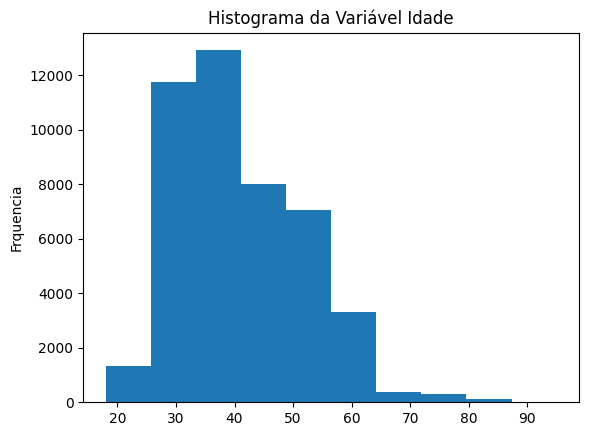

In [21]:
#Histograma 
df.age.plot(kind="hist")
plt.title("Histograma da Variável Idade")
plt.ylabel("Frquencia")
plt.show()

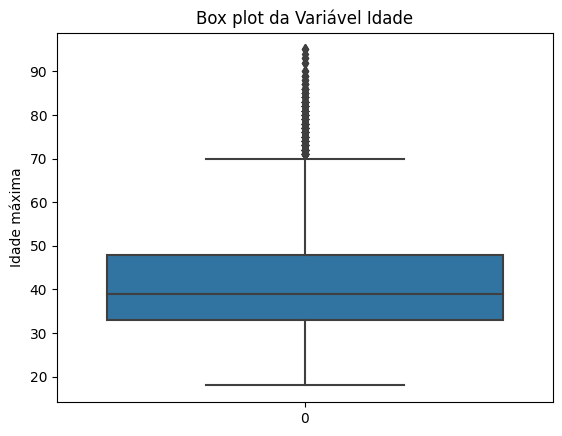

In [22]:
sns.boxplot(df.age)
plt.title("Box plot da Variável Idade")
plt.ylabel("Idade máxima")
plt.show()

In [23]:
#Vamos verificar a média da idade 
print(f'A média da variável idade é: {df.age.mean()}')

A média da variável idade é: 40.93565090394105


In [24]:
print(f'A mediana da variável idade é: {df.age.median()}')

A mediana da variável idade é: 39.0


In [25]:
print(f'A moda da variável idade é: {df.age.mode()}')

A moda da variável idade é: 0    32.0
Name: age, dtype: float64


*Imputação de dados na variável age, com a medida de tendência central, decidir escolher medidads, aplique a imputação e justifique sua escolha. Deixamos a variável com o float ou int? Se convertemos, fazemos isso antes ou depois da imputação*

In [26]:
#Preenchimento com a moda pois são poucos valores ausentes e assim alteramos muito poucos padrão nos dados
df.age.fillna('32', inplace=True)

In [27]:
#Agora vamos converte o float para int 
df.age = df.age.astype("int")

In [28]:
df.age.dtypes

dtype('int32')

In [29]:
#Média 
df.age.mean()

40.93169803808808

In [30]:
#Mediana 
df.age.median()

39.0

In [31]:
#Percentual de valores ausentes 
df.age.isnull().mean()*100

0.0

**Tratamento de valores ausentes** <br>
*Vamos tratar a variável que representa mês*


In [32]:
#Valores ausentes do dataframe 
df.isnull().any()

age          False
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month         True
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [33]:
#Valores ausentes na variável month 
print(f'Este é a quantidade de valores nulos na variável month {df.month.isnull().sum()}')

Este é a quantidade de valores nulos na variável month 50


In [34]:
#Porcentual
print(f'Este é o porcentual de valores nulos da variável month {df.month.isnull().mean()*100}')

Este é o porcentual de valores nulos da variável month 0.11059255490920351


*Com o porcentual é menor que 30% não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (neste caso) poderiamos ter 50 linhas no dataset ou podemos aplicar imputação, vamos usar a segunda opção.*

In [35]:
#Tipagem da variável 
df.month.dtypes

dtype('O')

In [36]:
#Sistema de categorico da variável 
df.month.value_counts()

may, 2017    13747
jul, 2017     6888
aug, 2017     6240
jun, 2017     5335
nov, 2017     3968
apr, 2017     2931
feb, 2017     2646
jan, 2017     1402
oct, 2017      738
sep, 2017      576
mar, 2017      476
dec, 2017      214
Name: month, dtype: int64

*Vamos aplicar imputação em valores ausentes na variável month para verificar alguns pontos estratégicos*

In [37]:
print(f'Esta é a moda de valores nulos: {df.month.mode()}')

Esta é a moda de valores nulos: 0    may, 2017
Name: month, dtype: object


In [38]:
#Imputação com a moda 
df.month.fillna("may 2017", inplace=True)

In [39]:
#Valores ausentes tratado com sucesso 
df.month.isnull().sum()

0

**Tratamento de valores ausentes**

In [40]:
df.isnull().any()

age          False
salary        True
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [41]:
print(f'A quantidade de valores nulos da variável salary {df.salary.isnull().sum()}')

A quantidade de valores nulos da variável salary 26


In [42]:
#Porcentual 
print(f'O porcentual da variável salary {df.salary.isnull().mean()*100}')

O porcentual da variável salary 0.05750812855278583


*Com o porcentual baixo não podemos eliminar a coluna. Podemos então eliminar os registros com valores ausentes (neste caso perderiamos 26 linhas no dataset) ou podemos aplicar imputação. Vamos usar a segunda opção*

In [43]:
df.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


*Existe salário igual a 0 ?* <br>
*Não o valor 0 é provavelmente um outilier ("Confirme a área de negócio")*

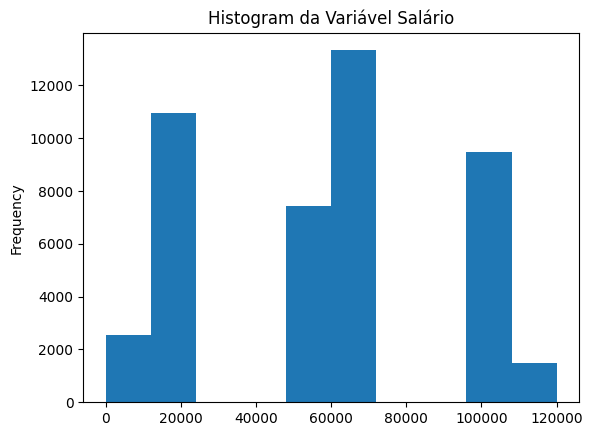

In [44]:
#Histograma
df.salary.plot(kind='hist')
plt.title("Histogram da Variável Salário")
plt.show()

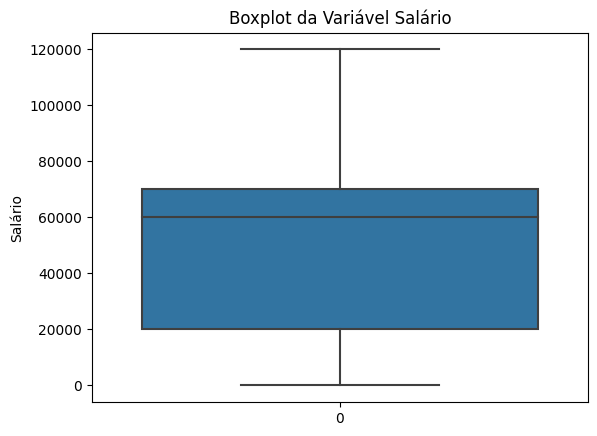

In [45]:
#Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário")
plt.ylabel("Salário")
plt.show()

In [46]:
print(f'A média de idade por salário é: {df.salary.mean()}')

A média de idade por salário é: 57008.65331415293


In [47]:
print(f'A mediana é: {df.salary.median()}')

A mediana é: 60000.0


In [48]:
print(f'A moda é: {df.salary.mode()}')

A moda é: 0    20000.0
Name: salary, dtype: float64


In [49]:
print(f'Valores ausentes da variável salary {df.salary.isnull().sum()}')

Valores ausentes da variável salary 26


**Dica**<br>

*Vamos preencher o valor ausente pois a mediana dos dados parecem assimétricos (neste caso a média não pode ser usado)* <br>

*E o valor estar mais frequente está muito abaixo da média e da mediana (por isso não usaremos a moda)*


In [50]:
df.salary.fillna("6000", inplace=True)

In [51]:
df.head(3)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int32 
 1   salary     45211 non-null  object
 2   balance    45211 non-null  int64 
 3   marital    45211 non-null  object
 4   targeted   45211 non-null  object
 5   default    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  response   45181 non-null  object
 17  job        45211 non-null  object
 18  education  45211 non-null  object
dtypes: int32(1), int64(5), object(13)
memory usage: 6.4+ MB


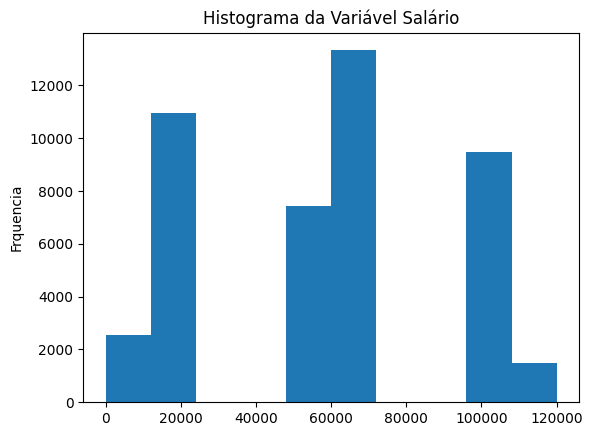

In [53]:
#Convertendo
df.salary = df.salary.astype('float')
#Plot
df.salary.plot(kind='hist')
plt.title("Histograma da Variável Salário")
plt.ylabel("Frquencia")
plt.show()

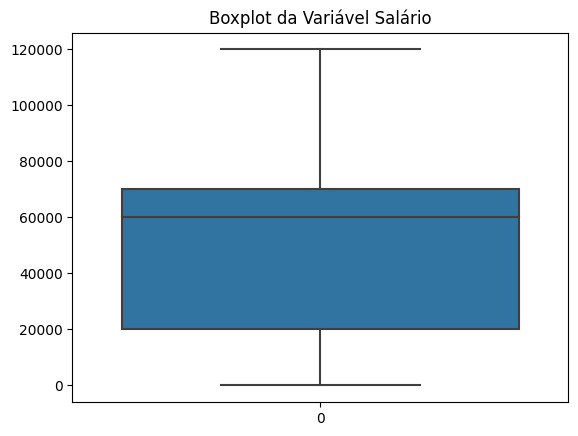

In [54]:
#Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot da Variável Salário")
plt.show()

In [55]:
#Registro da variável salary
df.salary.value_counts()

20000.0     9725
100000.0    9454
60000.0     9169
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
0.0          288
6000.0        26
Name: salary, dtype: int64

In [56]:
#Replace o zero para mediana
df['salary'] = df['salary'].replace(0, df['salary'].median())

In [57]:
df.salary.value_counts()

20000.0     9725
60000.0     9457
100000.0    9454
50000.0     5167
70000.0     4153
55000.0     2264
120000.0    1486
8000.0      1303
16000.0     1239
4000.0       937
6000.0        26
Name: salary, dtype: int64

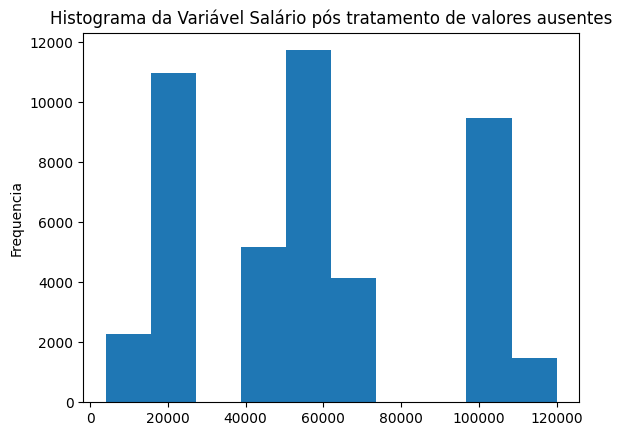

In [58]:
#Histograma 
df.salary.plot(kind='hist')
plt.title("Histograma da Variável Salário pós tratamento de valores ausentes")
plt.ylabel("Frequencia")
plt.show()

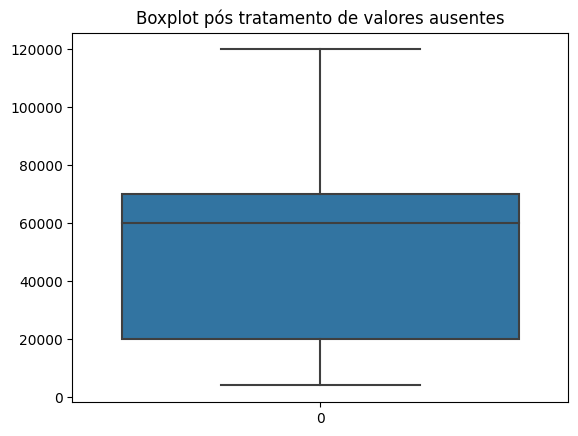

In [59]:
#Boxplot
sns.boxplot(df.salary)
plt.title("Boxplot pós tratamento de valores ausentes")
plt.show()

In [60]:
print(f'Valores ausente da variável salary {df.salary.isnull().sum()}') 

Valores ausente da variável salary 0


**Tratamento de valores ausente**

In [61]:
df.isnull().any()

age          False
salary       False
balance      False
marital      False
targeted     False
default      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
response      True
job          False
education    False
dtype: bool

In [62]:
#Quantidade de valores ausentes na variável response 
print(f'Quantidade de valores nulos da variável response: {df.response.isnull().sum()}')

Quantidade de valores nulos da variável response: 30


In [63]:
print(f'Média de valores nulos {df.response.isnull().median()}')

Média de valores nulos 0.0


In [64]:
print(f'A Media de valores nulos {df.response.isnull().mean()}')

A Media de valores nulos 0.000663555329455221


In [65]:
print(f'A Moda de valores nulos {df.response.isnull().mode()}')

A Moda de valores nulos 0    False
Name: response, dtype: bool


In [66]:
print(f'Valores somandos: {df.response.isnull().sum()}')

Valores somandos: 30


*Com o porcentual baixo (e a variável é o alvo da nossa análise) não podemos eliminar a coluna, podemos fazer o drop das linhas e perdemos 30 linhas do dataset ou fazer imputação dos dados*

In [67]:
#Dropei os valores ausentes da variável response poís não podemos aplicar imputação de dados na variável registro
df.dropna(subset=['response'], inplace=True)

In [68]:
#Verificando valores NA 
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

**Tratamento de valores ausentes**

In [69]:
df.pdays.isnull().sum()

0

In [70]:
df.balance.describe()

count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [71]:

# -1,dica valores de -1 por NaN
"""
    Valores ausentes verificado do NaN com numpy,
    Foi notado que a uma negatividade na descrições da variável pdays,
    
"""
df.pdays = df.pdays.replace({-1.0:np.NaN})

In [72]:
df.isnull().sum()

age              0
salary           0
balance          0
marital          0
targeted         0
default          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays        36930
previous         0
poutcome         0
response         0
job              0
education        0
dtype: int64

In [73]:
#calcular o percentual 
print(f'Percentual da variável pdyas com valores NaN {df.pdays.isnull().mean()*100}')

Percentual da variável pdyas com valores NaN 81.73789867422147


In [74]:
#Drop da coluna "pdays" pois tem mais de 30% de valores ausentes
df.drop(['pdays'], axis=1, inplace=True)

In [75]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

## Conclusão de Análise dos dados

In [76]:
#Análise Univariada 
#Proporção da variável estado cívil 
df.marital.value_counts()

married     27195
single      12782
divorced     5204
Name: marital, dtype: int64

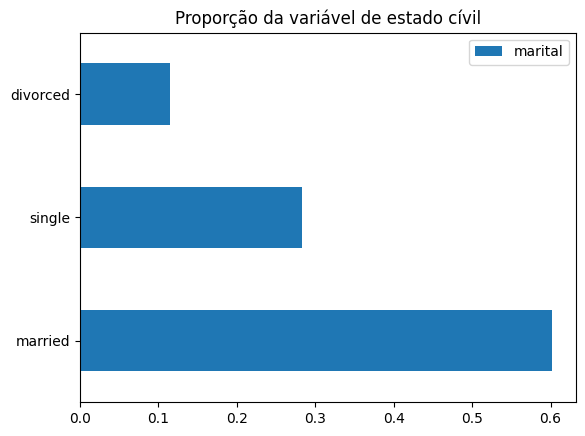

In [77]:
#Plot 
df.marital.value_counts(normalize=True).plot(kind='barh')
plt.title("Proporção da variável de estado cívil")
plt.legend()
plt.show()

In [78]:
#Proporção da variável Job 
df.job.value_counts(normalize=True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

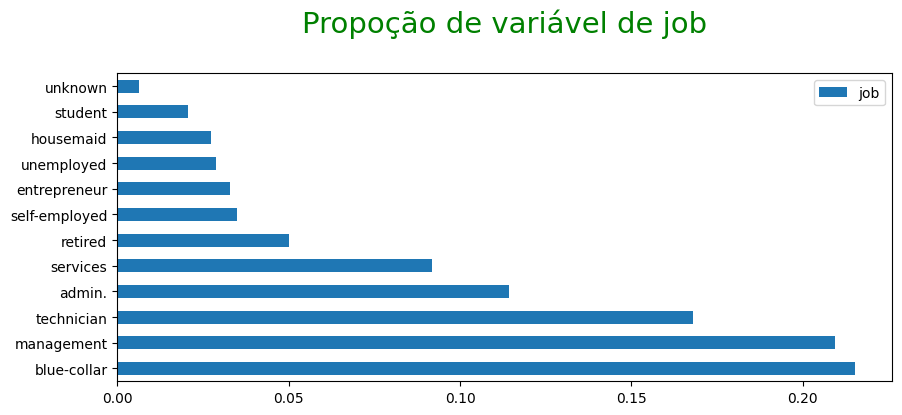

In [79]:
#Plot 
plt.figure(figsize=(10,4))
df.job.value_counts(normalize=True).plot(kind='barh')
plt.title("Propoção de variável de job\n", fontdict={'fontsize' : 21, 'fontweight': 5, 'color': 'Green'})
plt.legend()
plt.show()

In [80]:
#Proporção da variável education
df.education.value_counts(normalize=True)

secondary    0.513247
tertiary     0.294194
primary      0.151480
unknown      0.041079
Name: education, dtype: float64

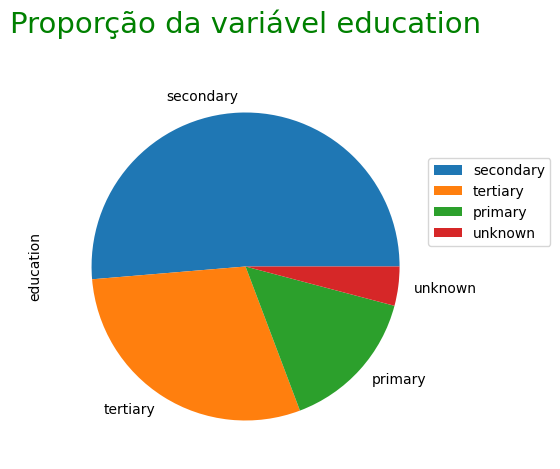

In [81]:
plt.figure(figsize=(10,5))
df.education.value_counts(normalize=True).plot(kind='pie')
plt.title("Proporção da variável education\n", fontdict={'fontsize': 21, 'fontweight': 4, 'color': 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31, 0.8))
plt.show()

In [82]:
#Proporção da variável response
df.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

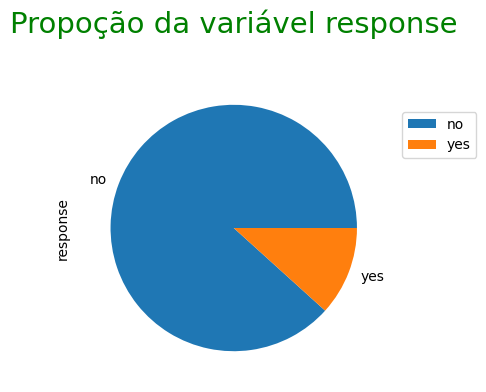

In [83]:
plt.figure(figsize=(10,4))
df.response.value_counts(normalize=True).plot(kind="pie")
plt.title("Propoção da variável response\n", fontdict={'fontsize': 21, 'fontweight': 4, 'color': 'Green'})
plt.legend()
plt.legend(bbox_to_anchor=(1.31, 0.9))
plt.show()

**Análise multivariada**

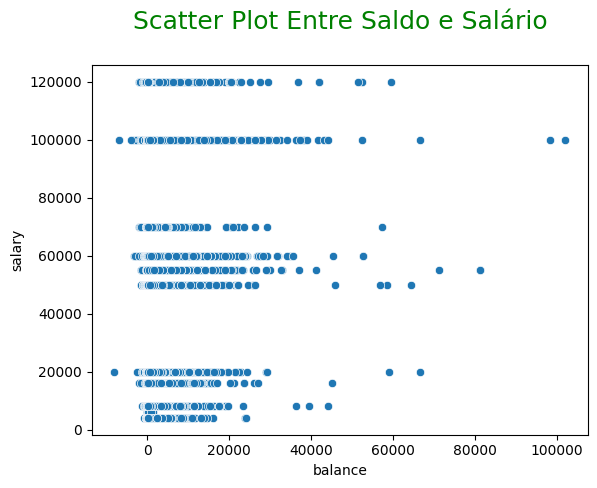

In [84]:
# Scatter Plot
sns.scatterplot(x=df['balance'], y=df['salary'])
plt.title("Scatter Plot Entre Saldo e Salário\n", fontdict = {'fontsize': 18, 'fontweight' : 10, 'color' : 'Green'})
plt.show()

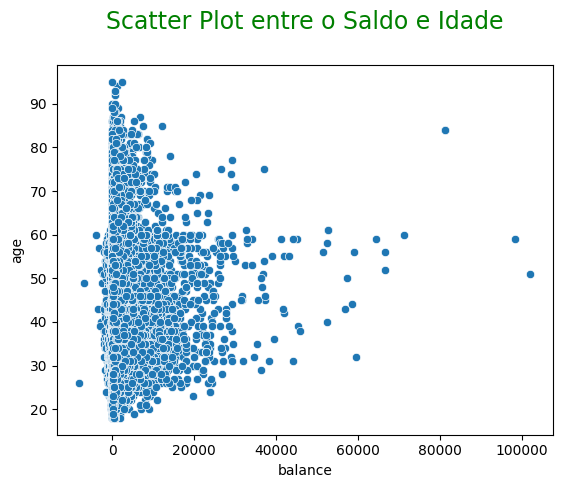

In [85]:
#Scatter plot 
sns.scatterplot(x=df['balance'], y=df['age'])
plt.title("Scatter Plot entre o Saldo e Idade\n", fontdict={'fontsize': 17, 'fontweight':4 , 'color': 'Green'})
plt.show()

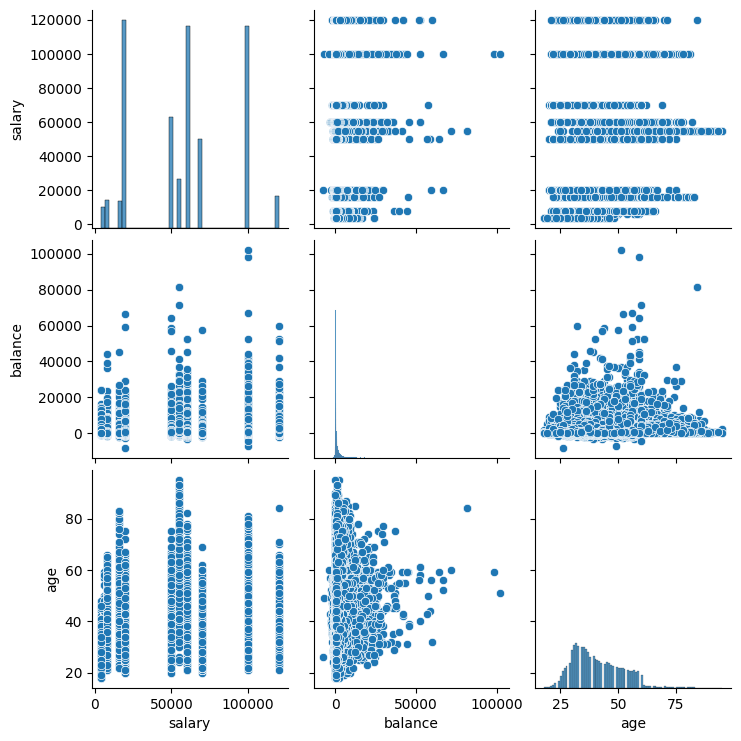

In [86]:
#Pair plot 
sns.pairplot(df[['salary', 'balance', 'age']])
plt.show()

In [87]:
#Calculando a correlação entre as 3 variáveis 
res =  df[['salary', 'balance', 'age']].corr()
res

,salary,balance,age
salary,1.000000,0.057871,0.031940
balance,0.057871,1.000000,0.097729
age,0.031940,0.097729,1.000000


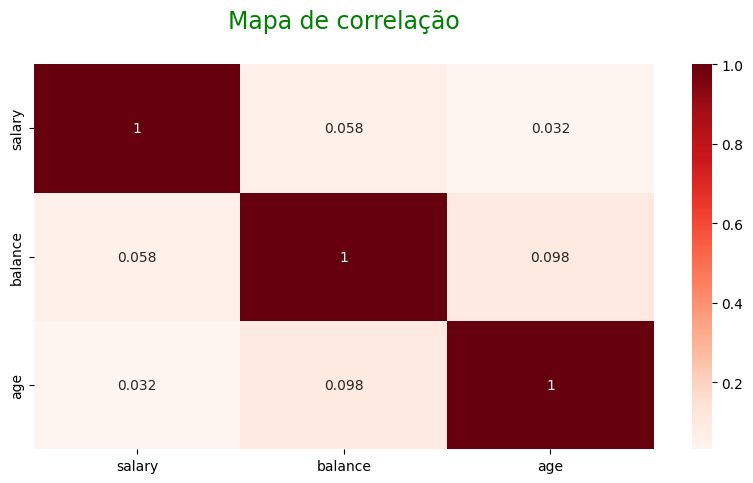

In [88]:
#Plot 
plt.figure(figsize=(10,5))
sns.heatmap(res, annot=True , cmap='Reds')
plt.title("Mapa de correlação\n", fontdict={'fontsize': 17, 'fontweight': 4, 'color': 'Green'})
plt.show()

**Númerico x Categórico**

In [89]:
#Agrupar o salário pela a variável resposta e calcular a média 
df.groupby(by=['response'])['salary'].mean()

response
no     57122.499624
yes    59157.556270
Name: salary, dtype: float64

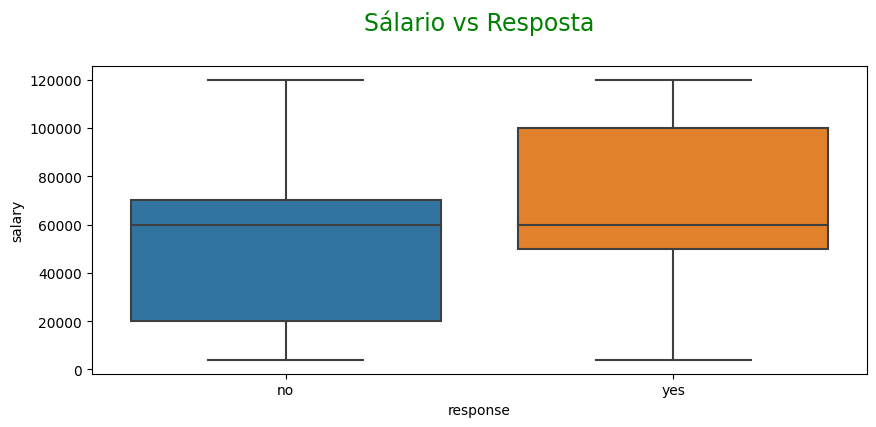

In [90]:
#Boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['response'], y=df['salary'])
plt.title("Sálario vs Resposta\n", fontdict={'fontsize': 17, 'fontweight': 4, 'color': 'Green'})
plt.show()

In [91]:
#Agrupar a educação por salário e calcular a média 
df.groupby(by=['education'])['salary'].mean()

education
primary      34657.656341
secondary    49899.133210
tertiary     83008.576587
unknown      50621.228448
Name: salary, dtype: float64

In [92]:
#Criar a variável response_flag com o tipo númerico onde response "yes" = 1, "no" =0 
df['response_flag'] = np.where(df['response'] == 'yes', 1,0)
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,previous,poutcome,response,job,education,response_flag
0,58,100000.0,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,0,unknown,no,management,tertiary,0
1,44,60000.0,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,0,unknown,no,technician,secondary,0
2,33,120000.0,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,0,unknown,no,entrepreneur,secondary,0
3,47,20000.0,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,0,unknown,no,blue-collar,unknown,0
4,33,60000.0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,0,unknown,no,unknown,unknown,0


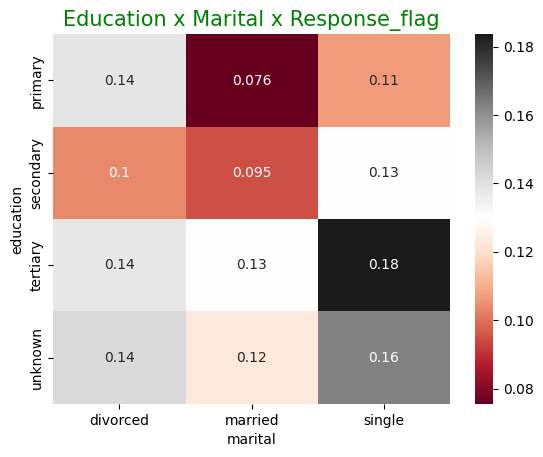

In [93]:
response_one = df.pivot_table(index='education', columns='marital', values='response_flag', aggfunc='mean')
sns.heatmap(response_one, annot=True, cmap="RdGy")
plt.title("Education x Marital x Response_flag", fontdict={'fontsize': 15, 'fontweight': 4 , 'color': 'Green'})
plt.show()

In [100]:
df.to_csv('data//data-set-atulizado.csv')

# Fim